In [1]:
from utils.imagenet_utils import load_data
from utils.layer_utils import *
from utils.model_utils import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pickle
from tensorflow.keras.models import model_from_json 

In [2]:
# %%time
# train_data,train_label,val_data,val_label = load_data()

In [3]:
# np.save('train_label.npy',train_label)
# np.save('train_data.npy',train_data)
# np.save('val_data.npy',val_data)
# np.save('val_label.npy',val_label)

In [4]:
train_label = np.load('train_label.npy')
train_data = np.load('train_data.npy')
val_data = np.load('val_data.npy')
val_label = np.load('val_label.npy')

In [5]:
%%time
index_list = list(set(train_label))
train_data = np.array(train_data)
train_label = np.array([np.array([index_list.index(i)],dtype=np.uint8) for i in train_label])
val_data = np.array(val_data)
val_label = np.array([np.array([index_list.index(i)],dtype=np.uint8) for i in val_label])

CPU times: user 5.96 s, sys: 8.03 s, total: 14 s
Wall time: 2.29 s


In [6]:
print('Training data shape: ', train_data.shape)
print('Training labels shape: ', train_label.shape)
print('Validation data shape: ', val_data.shape)
print('Validation labels shape: ', val_label.shape)

Training data shape:  (78117, 224, 224, 3)
Training labels shape:  (78117, 1)
Validation data shape:  (19643, 224, 224, 3)
Validation labels shape:  (19643, 1)


In [7]:
train_label = keras.utils.to_categorical(train_label)
val_label = keras.utils.to_categorical(val_label)

In [8]:
def generator(X, y, batch_size, shuffle):
    base_gen = ImageDataGenerator()
    for X_base, y_base in base_gen.flow(X, y, batch_size=batch_size, shuffle=shuffle):
        X_batch = X_base / 255.0
        yield X_batch, y_base

In [9]:
%%time
bs = 64 #batch size
epc = 20 #number of epoches
train_generator = generator(train_data, train_label, bs,True)
val_generator = generator(val_data, val_label, bs,True)
# train_datagen=ImageDataGenerator()
# train_generator = train_datagen.flow(train_data_1, train_label_1, batch_size=bs)
step_size_train = train_data.shape[0]//bs
validation_steps=val_data.shape[0]//1000

CPU times: user 3 µs, sys: 5 µs, total: 8 µs
Wall time: 10.5 µs


In [10]:
%%time
m6=PeleeNet(input_shape=(224,224,3), n_classes=198)
m6.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m6.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization_v1[0][0]     
_____________________________________

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1220/1220 [==============================] - 329s 270ms/step - loss: 5.1955 - acc: 0.1307 - val_loss: 4.5204 - val_acc: 0.1513
Epoch 2/20
1220/1220 [==============================] - 289s 236ms/step - loss: 3.5946 - acc: 0.2741 - val_loss: 3.6262 - val_acc: 0.2681
Epoch 3/20
1220/1220 [==============================] - 288s 236ms/step - loss: 3.1596 - acc: 0.3548 - val_loss: 3.4852 - val_acc: 0.2985
Epoch 4/20
1220/1220 [==============================] - 289s 237ms/step - loss: 2.9148 - acc: 0.4035 - val_loss: 3.3131 - val_acc: 0.3413
Epoch 5/20
1220/1220 [==============================] - 289s 237ms/step - loss: 2.7358 - acc: 0.4414 - val_loss: 3.0883 - val_acc: 0.3816
Epoch 6/20
1220/1220 [==============================] - 289s 237ms/step - loss: 2.5881 - acc: 0.4704 - val_loss: 2.9787 - val_acc: 0.3947
Epoch 7/20
1220/1220 [==============================] - 289s 237ms/step - loss: 2.4755 - acc: 0.4902 - val_loss: 2.8946 - va

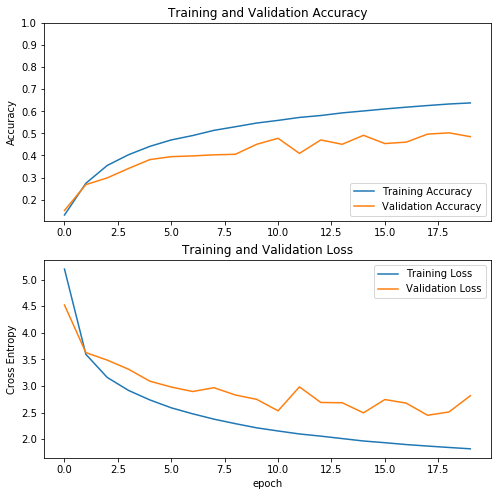

CPU times: user 1h 38min 53s, sys: 23min 55s, total: 2h 2min 49s
Wall time: 1h 37min 42s


In [11]:
%%time
history_6 = m6.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_6.history['acc']
val_acc = history_6.history['val_acc']

loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [12]:
%%time
# serialize weights to HDF5
m6.save_weights("./models/imagenet/m6.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 1min 56s, sys: 22.1 ms, total: 1min 56s
Wall time: 1min 55s


In [13]:
%%time
m5=model5(input_shape=(224,224,3), n_classes=198)
m5.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_113 (Bat (None, 112, 112, 32) 128         conv2d_113[0][0]                 
__________________________________________________________________________________________________
activation_113 (Activation)     (None, 112, 112, 32) 0           batch_normalization_v1_113[0][0] 
__________________________________________________________________________________________________
conv2d_114

Epoch 1/20
1220/1220 [==============================] - 294s 241ms/step - loss: 5.1911 - acc: 0.1295 - val_loss: 4.4274 - val_acc: 0.1587
Epoch 2/20
1220/1220 [==============================] - 269s 220ms/step - loss: 3.5889 - acc: 0.2738 - val_loss: 3.8601 - val_acc: 0.2344
Epoch 3/20
1220/1220 [==============================] - 269s 220ms/step - loss: 3.1478 - acc: 0.3519 - val_loss: 4.1268 - val_acc: 0.1990
Epoch 4/20
1220/1220 [==============================] - 272s 223ms/step - loss: 2.8792 - acc: 0.4084 - val_loss: 3.0245 - val_acc: 0.3816
Epoch 5/20
1220/1220 [==============================] - 271s 222ms/step - loss: 2.6926 - acc: 0.4485 - val_loss: 3.0212 - val_acc: 0.3725
Epoch 6/20
1220/1220 [==============================] - 269s 221ms/step - loss: 2.5535 - acc: 0.4781 - val_loss: 3.1683 - val_acc: 0.3618
Epoch 7/20
1220/1220 [==============================] - 269s 221ms/step - loss: 2.4392 - acc: 0.4978 - val_loss: 2.6768 - val_acc: 0.4531
Epoch 8/20
1220/1220 [============

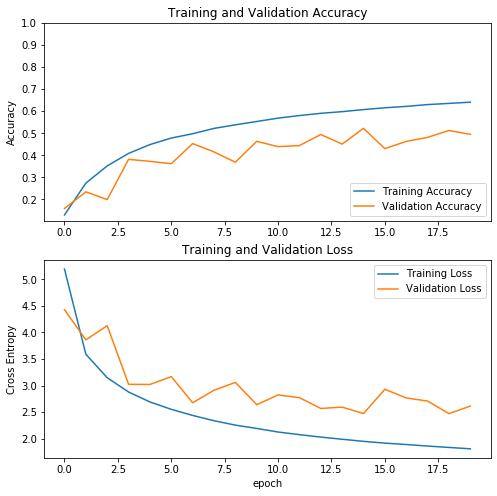

CPU times: user 1h 31min 55s, sys: 23min 52s, total: 1h 55min 48s
Wall time: 1h 31min 8s


In [14]:
%%time
history_5 = m5.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_5.history['acc']
val_acc = history_5.history['val_acc']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
%%time
# serialize weights to HDF5
m5.save_weights("./models/imagenet/m5.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 3min 27s, sys: 0 ns, total: 3min 27s
Wall time: 3min 26s


In [16]:
%%time
m4=model4(input_shape=(224,224,3), n_classes=198)
m4.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
activation_211 (Activation)     (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_211 (Bat (None, 224, 224, 3)  12          activation_211[0][0]             
__________________________________________________________________________________________________
conv2d_211 (Conv2D)             (None, 112, 112, 32) 896         batch_normalization_v1_211[0][0] 
__________________________________________________________________________________________________
activation

Epoch 1/20
1220/1220 [==============================] - 155s 127ms/step - loss: 5.3910 - acc: 0.0305 - val_loss: 5.2254 - val_acc: 0.0403
Epoch 2/20
1220/1220 [==============================] - 145s 119ms/step - loss: 4.8884 - acc: 0.0650 - val_loss: 4.8780 - val_acc: 0.0781
Epoch 3/20
1220/1220 [==============================] - 146s 119ms/step - loss: 4.6409 - acc: 0.0865 - val_loss: 4.5766 - val_acc: 0.0880
Epoch 4/20
1220/1220 [==============================] - 146s 120ms/step - loss: 4.4641 - acc: 0.1034 - val_loss: 4.5913 - val_acc: 0.0831
Epoch 5/20
1220/1220 [==============================] - 146s 119ms/step - loss: 4.3385 - acc: 0.1161 - val_loss: 4.5687 - val_acc: 0.0875
Epoch 6/20
1220/1220 [==============================] - 146s 119ms/step - loss: 4.2293 - acc: 0.1285 - val_loss: 4.3324 - val_acc: 0.1308
Epoch 7/20
1220/1220 [==============================] - 146s 120ms/step - loss: 4.1369 - acc: 0.1414 - val_loss: 4.3989 - val_acc: 0.1094
Epoch 8/20
1220/1220 [============

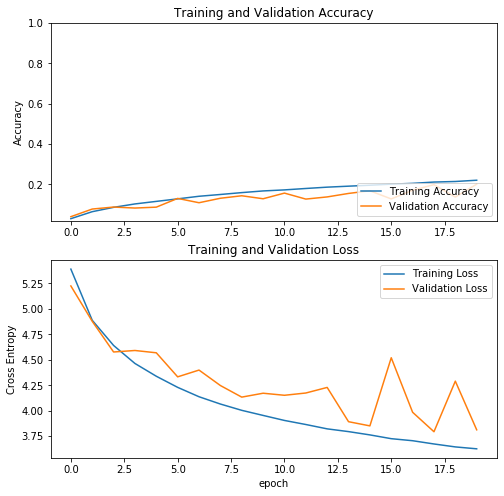

CPU times: user 53min 5s, sys: 19min 50s, total: 1h 12min 56s
Wall time: 49min 31s


In [17]:
%%time
history_4 = m4.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_4.history['acc']
val_acc = history_4.history['val_acc']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
%%time
# serialize weights to HDF5
m4.save_weights("./models/imagenet/m4.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 2min, sys: 0 ns, total: 2min
Wall time: 2min


In [19]:
%%time
m3=model3(input_shape=(224,224,3), n_classes=198)
m3.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
activation_255 (Activation)  (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_v1_255 ( (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 224, 224, 16)      64        
_________________________________________________________________
activation_256 (Activation)  (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_v1_256 ( (None, 224, 224, 16)      64        
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 224, 224, 16)      2320      
__________

Epoch 1/20
1220/1220 [==============================] - 601s 493ms/step - loss: 5.1091 - acc: 0.0374 - val_loss: 5.0413 - val_acc: 0.0495
Epoch 2/20
1220/1220 [==============================] - 589s 483ms/step - loss: 4.5762 - acc: 0.0760 - val_loss: 4.7509 - val_acc: 0.0584
Epoch 3/20
1220/1220 [==============================] - 589s 483ms/step - loss: 4.3117 - acc: 0.1082 - val_loss: 4.2752 - val_acc: 0.1258
Epoch 4/20
1220/1220 [==============================] - 589s 483ms/step - loss: 4.1349 - acc: 0.1326 - val_loss: 4.2682 - val_acc: 0.1094
Epoch 5/20
1220/1220 [==============================] - 589s 483ms/step - loss: 4.0321 - acc: 0.1475 - val_loss: 4.3009 - val_acc: 0.1110
Epoch 6/20
1220/1220 [==============================] - 589s 483ms/step - loss: 3.9351 - acc: 0.1651 - val_loss: 4.5178 - val_acc: 0.1102
Epoch 7/20
1220/1220 [==============================] - 589s 483ms/step - loss: 3.8593 - acc: 0.1776 - val_loss: 3.9502 - val_acc: 0.1702
Epoch 8/20
1220/1220 [============

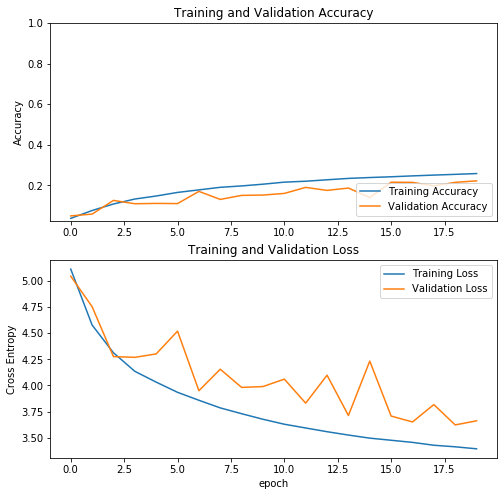

CPU times: user 2h 3min 41s, sys: 45min 13s, total: 2h 48min 54s
Wall time: 3h 17min 21s


In [20]:
%%time
history_3 = m3.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
%%time
# serialize weights to HDF5
m3.save_weights("./models/imagenet/m3.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 2min 13s, sys: 0 ns, total: 2min 13s
Wall time: 2min 12s


In [22]:
%%time
m0=DenseNet41(input_shape=(224,224,3), n_classes=198)
m0.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
activation_295 (Activation)  (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_v1_295 ( (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_295 (Conv2D)          (None, 224, 224, 16)      64        
_________________________________________________________________
activation_296 (Activation)  (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_v1_296 ( (None, 224, 224, 16)      64        
_________________________________________________________________
conv2d_296 (Conv2D)          (None, 224, 224, 16)      2320      
__________

Epoch 1/20
1220/1220 [==============================] - 465s 382ms/step - loss: 5.0704 - acc: 0.0363 - val_loss: 4.7739 - val_acc: 0.0553
Epoch 2/20
1220/1220 [==============================] - 454s 372ms/step - loss: 4.6428 - acc: 0.0707 - val_loss: 4.6114 - val_acc: 0.0888
Epoch 3/20
1220/1220 [==============================] - 454s 372ms/step - loss: 4.4020 - acc: 0.0973 - val_loss: 4.4948 - val_acc: 0.0839
Epoch 4/20
1220/1220 [==============================] - 454s 372ms/step - loss: 4.2431 - acc: 0.1170 - val_loss: 4.3218 - val_acc: 0.1094
Epoch 5/20
1220/1220 [==============================] - 454s 372ms/step - loss: 4.1293 - acc: 0.1323 - val_loss: 4.0464 - val_acc: 0.1357
Epoch 6/20
1220/1220 [==============================] - 454s 372ms/step - loss: 4.0348 - acc: 0.1467 - val_loss: 4.2392 - val_acc: 0.1176
Epoch 7/20
1220/1220 [==============================] - 454s 372ms/step - loss: 3.9580 - acc: 0.1579 - val_loss: 4.2062 - val_acc: 0.1217
Epoch 8/20
1220/1220 [============

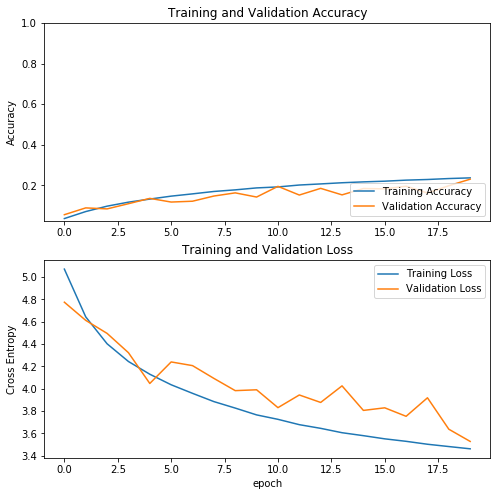

CPU times: user 1h 41min 52s, sys: 36min 7s, total: 2h 18min
Wall time: 2h 32min 29s


In [23]:
%%time
history_0 = m0.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_0.history['acc']
val_acc = history_0.history['val_acc']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
%%time
# serialize weights to HDF5
m0.save_weights("./models/imagenet/m0.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 2min 34s, sys: 0 ns, total: 2min 34s
Wall time: 2min 34s


In [25]:
%%time
m1=model1(input_shape=(224,224,3), n_classes=198)
m1.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
activation_335 (Activation)  (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_v1_335 ( (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_335 (Conv2D)          (None, 224, 224, 16)      64        
_________________________________________________________________
activation_336 (Activation)  (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_v1_336 ( (None, 224, 224, 16)      64        
_________________________________________________________________
conv2d_336 (Conv2D)          (None, 224, 224, 16)      2320      
__________

Epoch 1/20
1220/1220 [==============================] - 545s 447ms/step - loss: 5.0962 - acc: 0.0342 - val_loss: 5.0390 - val_acc: 0.0419
Epoch 2/20
1220/1220 [==============================] - 534s 438ms/step - loss: 4.6302 - acc: 0.0698 - val_loss: 4.6741 - val_acc: 0.0751
Epoch 3/20
1220/1220 [==============================] - 534s 438ms/step - loss: 4.4042 - acc: 0.0965 - val_loss: 4.4075 - val_acc: 0.0995
Epoch 4/20
1220/1220 [==============================] - 534s 438ms/step - loss: 4.2580 - acc: 0.1134 - val_loss: 4.3256 - val_acc: 0.1135
Epoch 5/20
1220/1220 [==============================] - 534s 438ms/step - loss: 4.1357 - acc: 0.1297 - val_loss: 4.1083 - val_acc: 0.1308
Epoch 6/20
1220/1220 [==============================] - 534s 438ms/step - loss: 4.0294 - acc: 0.1441 - val_loss: 4.2194 - val_acc: 0.1258
Epoch 7/20
1220/1220 [==============================] - 534s 438ms/step - loss: 3.9411 - acc: 0.1578 - val_loss: 4.0634 - val_acc: 0.1324
Epoch 8/20
1220/1220 [============

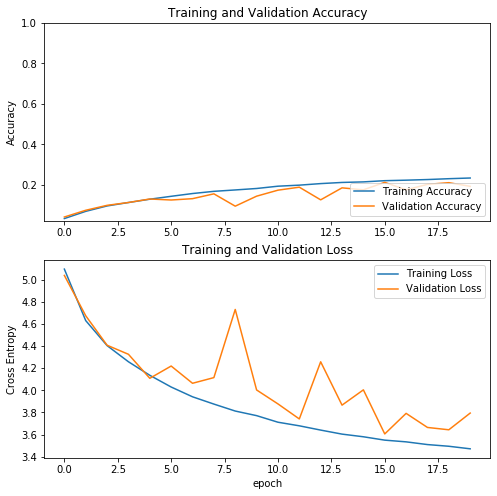

CPU times: user 1h 59min 58s, sys: 45min 21s, total: 2h 45min 19s
Wall time: 2h 59min 21s


In [26]:
%%time
history_1 = m1.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_1.history['acc']
val_acc = history_1.history['val_acc']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [27]:
%%time
# serialize weights to HDF5
m1.save_weights("./models/imagenet/m1.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 3min 1s, sys: 0 ns, total: 3min 1s
Wall time: 3min 1s


In [28]:
%%time
m2=model2(input_shape=(224,224,3), n_classes=198)
m2.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_375 (Conv2D)          (None, 224, 224, 16)      64        
_________________________________________________________________
batch_normalization_v1_375 ( (None, 224, 224, 16)      64        
_________________________________________________________________
activation_375 (Activation)  (None, 224, 224, 16)      0         
_________________________________________________________________
conv2d_376 (Conv2D)          (None, 224, 224, 16)      2320      
_________________________________________________________________
batch_normalization_v1_376 ( (None, 224, 224, 16)      64        
_________________________________________________________________
activation_376 (Activation)  (None, 224, 224, 16)      0         
__________

In [29]:
%%time
history_2 = m2.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Epoch 1/20


ResourceExhaustedError: OOM when allocating tensor with shape[64,704,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_12/Adam/gradients/zeros}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_6/dense_6_loss/broadcast_weights/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [30]:
%%time
# serialize weights to HDF5
m2.save_weights("./models/imagenet/m2.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 3min 26s, sys: 0 ns, total: 3min 26s
Wall time: 3min 26s


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


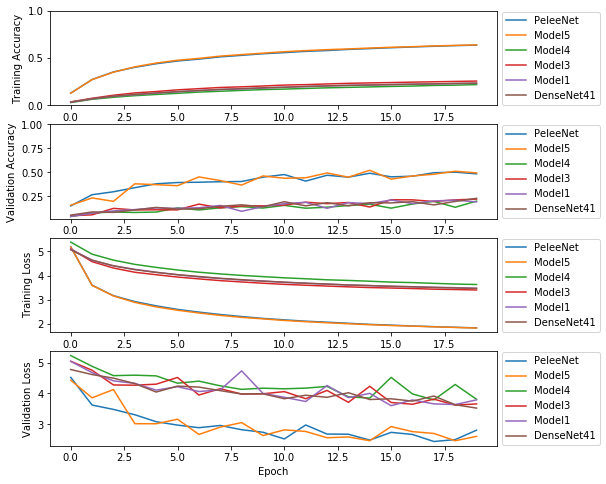

In [35]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(history_6.history['acc'], label='PeleeNet')
plt.plot(history_5.history['acc'], label='Model5')
plt.plot(history_4.history['acc'], label='Model4')
plt.plot(history_3.history['acc'], label='Model3')
# plt.plot(history_2.history['acc'], label='Model2')
plt.plot(history_1.history['acc'], label='Model1')
plt.plot(history_0.history['acc'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.ylim([min(plt.ylim()),1])

plt.subplot(4, 1, 2)
plt.plot(history_6.history['val_acc'], label='PeleeNet')
plt.plot(history_5.history['val_acc'], label='Model5')
plt.plot(history_4.history['val_acc'], label='Model4')
plt.plot(history_3.history['val_acc'], label='Model3')
# plt.plot(history_2.history['val_acc'], label='Model2')
plt.plot(history_1.history['val_acc'], label='Model1')
plt.plot(history_0.history['val_acc'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylim([min(plt.ylim()),1])

plt.subplot(4, 1, 3)
plt.plot(history_6.history['loss'], label='PeleeNet')
plt.plot(history_5.history['loss'], label='Model5')
plt.plot(history_4.history['loss'], label='Model4')
plt.plot(history_3.history['loss'], label='Model3')
# plt.plot(history_2.history['loss'], label='Model2')
plt.plot(history_1.history['loss'], label='Model1')
plt.plot(history_0.history['loss'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Training Loss')
plt.xlabel('Epoch')

plt.subplot(4, 1, 4)
plt.plot(history_6.history['val_loss'], label='PeleeNet')
plt.plot(history_5.history['val_loss'], label='Model5')
plt.plot(history_4.history['val_loss'], label='Model4')
plt.plot(history_3.history['val_loss'], label='Model3')
# plt.plot(history_2.history['val_loss'], label='Model2')
plt.plot(history_1.history['val_loss'], label='Model1')
plt.plot(history_0.history['val_loss'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')

plt.show()